###***ΛΑΖΑΡΟΣ ΦΡΑΓΚΑΚΟΣ***
**1115201600187**

###Imports and mount

In [ ]:
from google.colab import drive
from os import chdir

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import math

###[Ερώτημα 1: Πράξεις με Διανύσματα και Πίνακες]

(Περα απο τον χειρογραφο υπολογισμο των ζητουμενων και την επιβεβαιωση με numpy, εχω υλοποιηση καποιες απλες συναρτησεις που κανουν τους ιδιους υπολογισμους για περαιτερω κατανοηση)

>Η εξοικείωση με το λογισμό διανυσμάτων και πινάκων είναι απαραίτητη για την κατανόηση
και την υλοποίηση αλγορίθμων μηχανικής μάθησης. Για το σκοπό αυτό, καλείστε να
απαντήσετε στα παρακάτω ερωτήματα.

Δημιουργια των δύο τυχαίων πινακων ακέραιων αριθμών

In [ ]:
np.random.seed(1187) #1115201600187 (Seed does not accept number starting with 0) 
X = np.random.randint(1, 16, size=(3,4))
Y = np.random.randint(1, 16, size=(4,3))
print(X, '\n')
print(Y)

[[ 8  1 15  9]
 [ 3  8  5  9]
 [15  1  4 14]] 

[[ 2 13 14]
 [10  9  9]
 [ 4 12  1]
 [ 5  6  2]]


Δημιουργια των δύο τυχαίων διανυσματων ακέραιων αριθμών

In [ ]:
a = np.random.randint (1, 16, size=4)
b = np.random.randint (1, 16, size=4)
print(a, '\n')
print(b)

[14  3  8 11] 

[10  1 13  1]


>1.1 Να υπολογίσετε το εσωτερικό γινόμενο των διανυσμάτων a και b

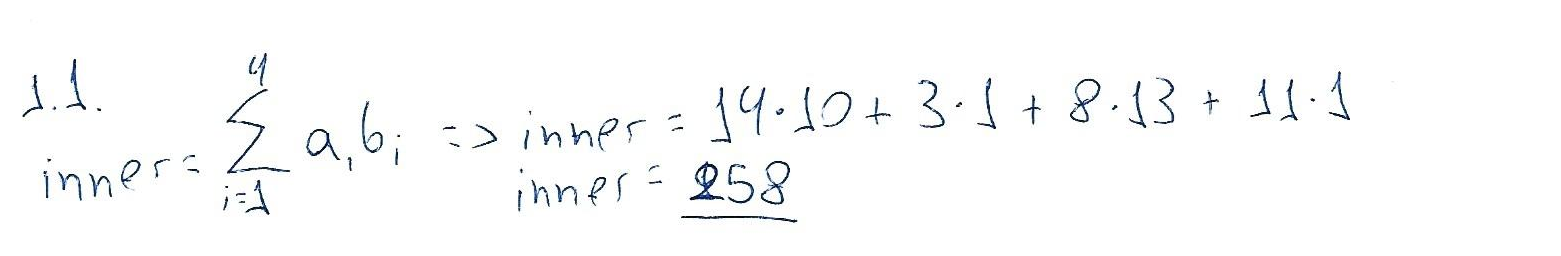

In [ ]:
def manualTranspose(vector):
    result = np.zeros([vector.shape[0], 1])
    for i, el in enumerate(vector):
        result[i][0] = el
    return result

def inner(a,b):
    if a.shape[0] != b.shape[0]:
        print("Not same lenght")
        return -1
    sum = 0
    at = manualTranspose(a)
    for i in range(a.shape[0]):
        sum += at[i]*b[i]
    return (int)(sum)    

#Calculating by hand
print('Calculating by hand')
print(inner(a,b))
#And now confirm with numpy
inner = np.inner(a, b) 
#Calculating with numpy
print('Calculating with numpy') 
print(inner)

Calculating by hand
258
Calculating with numpy
258


>1.2 Να υπολογίσετε το γινόμενο πίνακα-διανύσματος Xa

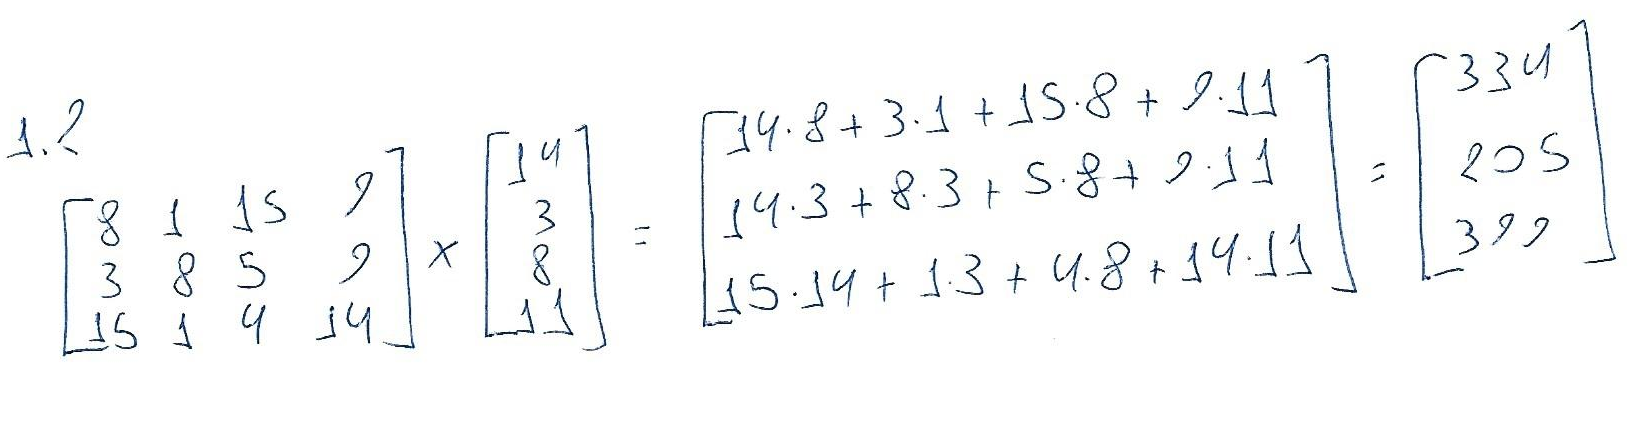

In [ ]:
def arrayVectorMult(array, vector):
    result = []
    for row in array:
        sum = 0
        for i, col in enumerate(row):
            sum += col*vector[i]
        result.append(sum) 
    return np.array(result)  

#Calculating by hand
print('Calculating by hand')     
print(arrayVectorMult(X,a))

#Calculating with numpy
print('Calculating with numpy')
print(np.dot(X,a))


Calculating by hand
[334 205 399]
Calculating with numpy
[334 205 399]


>1.3 Να υπολογίσετε το γινόμενο πινάκων X Y

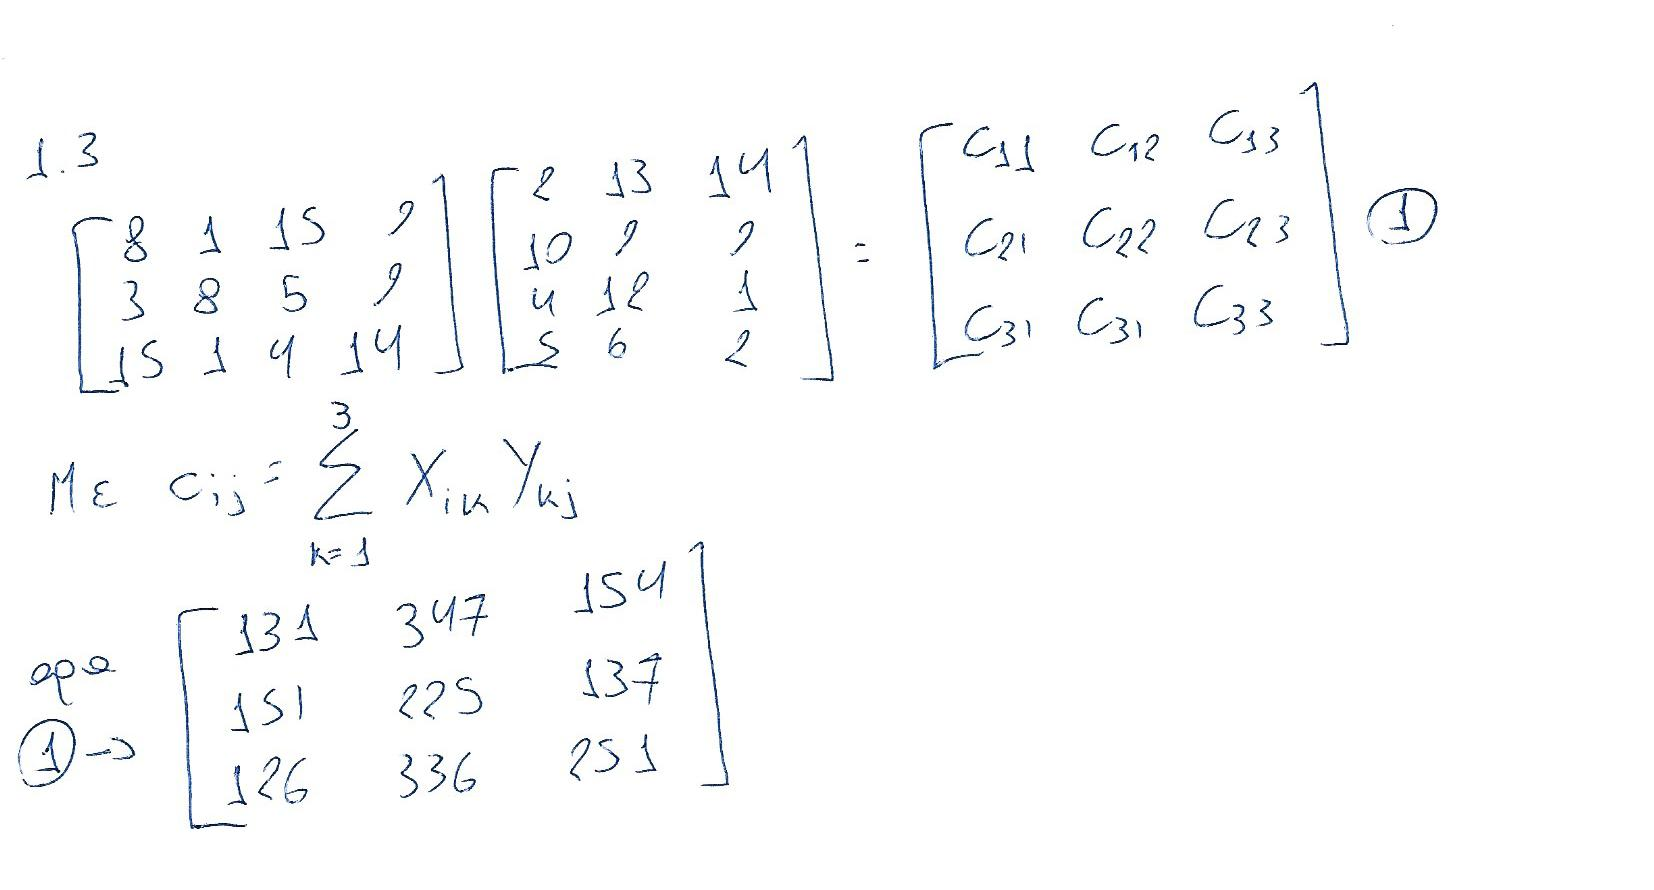

In [ ]:
def arrayMult(array_1, array_2):
    result = np.zeros([array_1.shape[0],array_2.shape[1]])
    for i, row in enumerate(array_1):
        for z in range(array_2.shape[1]):
            sum = 0
            for y in range(array_2.shape[0]):
                sum += array_2[y][z]*row[y]  
            result[i][z] = sum
    return np.array(result)           



#Calculating by hand
print('Calculating by hand')     
print(arrayMult(X,Y))

#Calculating with numpy
print('Calculating with numpy')
print(np.dot(X,Y))

Calculating by hand
[[131. 347. 154.]
 [151. 225. 137.]
 [126. 336. 251.]]
Calculating with numpy
[[131 347 154]
 [151 225 137]
 [126 336 251]]


>1.4 Να υπολογίσετε την Ευκλείδεια νόρμα (l2-norm) του διανύσματος a

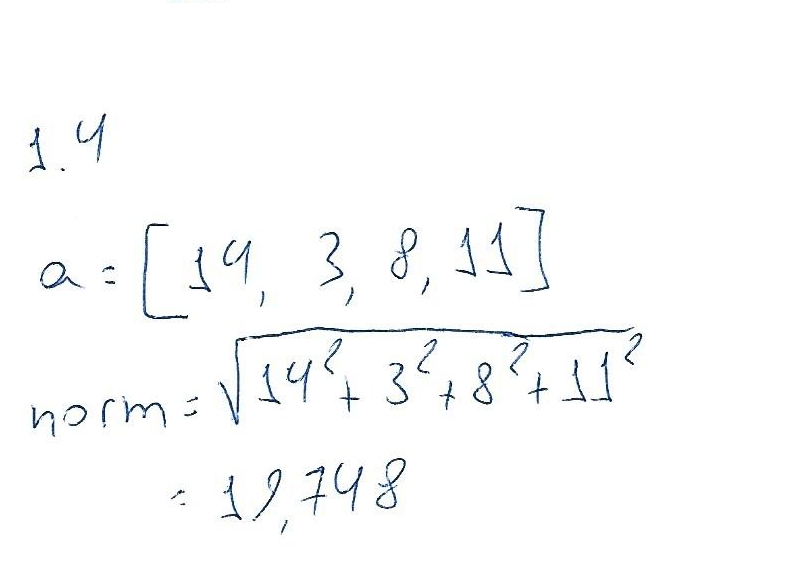

In [ ]:
def euclideanNorm(vector):
    sum = 0
    for el in vector:
        sum += np.power(el,2)
    return np.sqrt(sum) 

#Calculating by hand
print('Calculating by hand')  
r = euclideanNorm(a)
print(r)
#Calculating with numpy
print('Calculating with numpy')
print(np.linalg.norm(a))       

Calculating by hand
19.748417658131498
Calculating with numpy
19.748417658131498


>1.5 Να υπολογίσετε την Frobenius νόρμα του πίνακα X

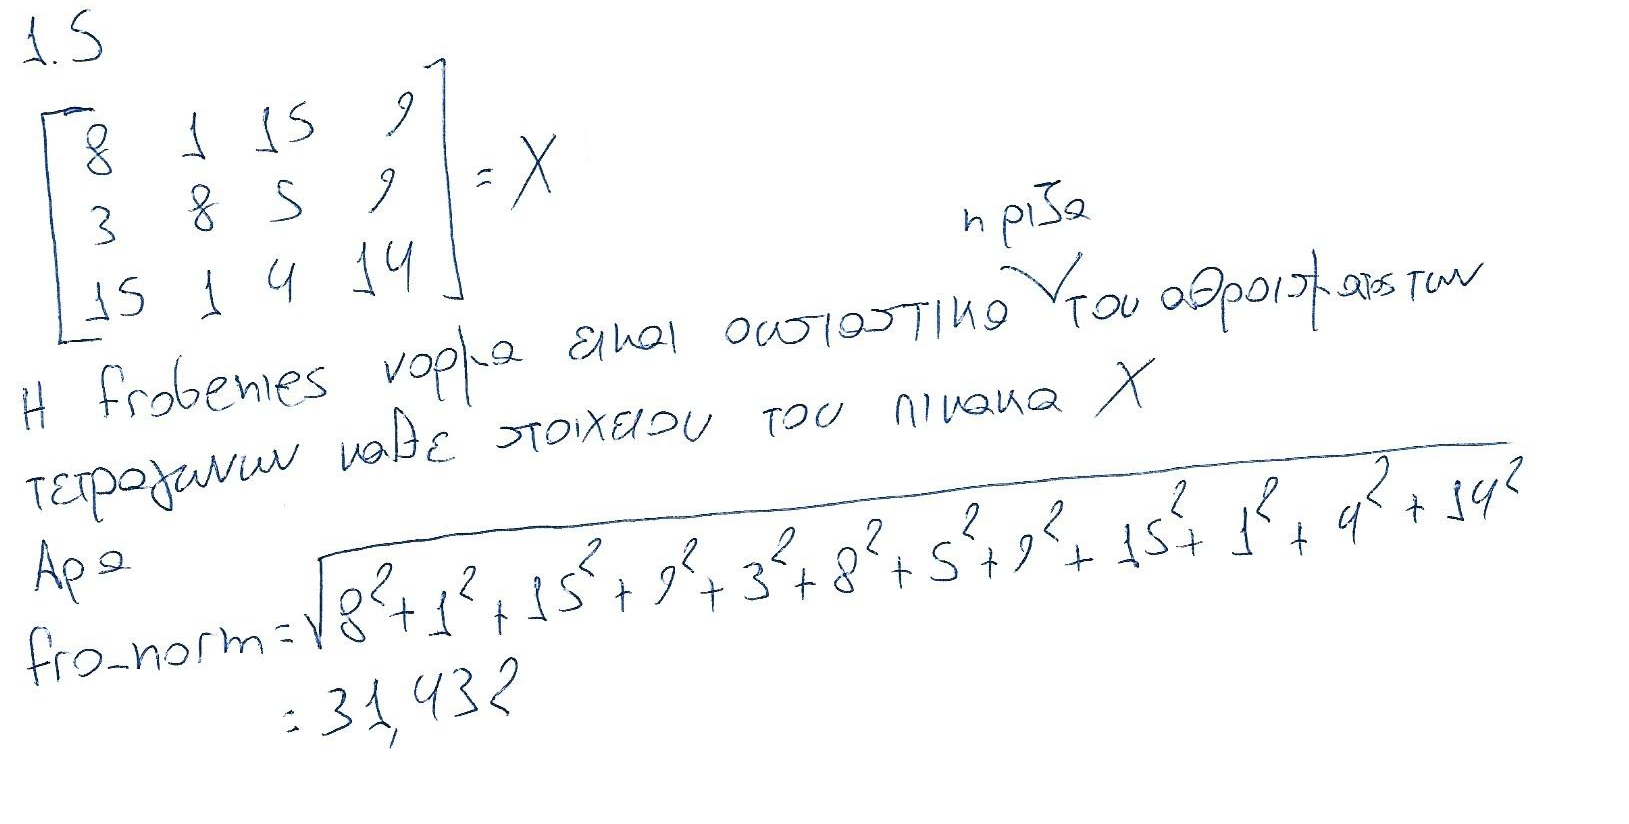

In [ ]:
def frobeniusNorm(array_1):
    sum = 0
    for row in array_1:
        for col in row:
            sum += np.power(col,2)
    return(np.sqrt(sum))   

#Calculating by hand
print('Calculating by hand') 
print(frobeniusNorm(X)) 

#Calculating with numpy
print('Calculating with numpy')
print(np.linalg.norm(X, 'fro'))        

Calculating by hand
31.432467291003423
Calculating with numpy
31.432467291003423


###[Ερώτημα 2: Υπολογισμός παραγώγων]

>2.1

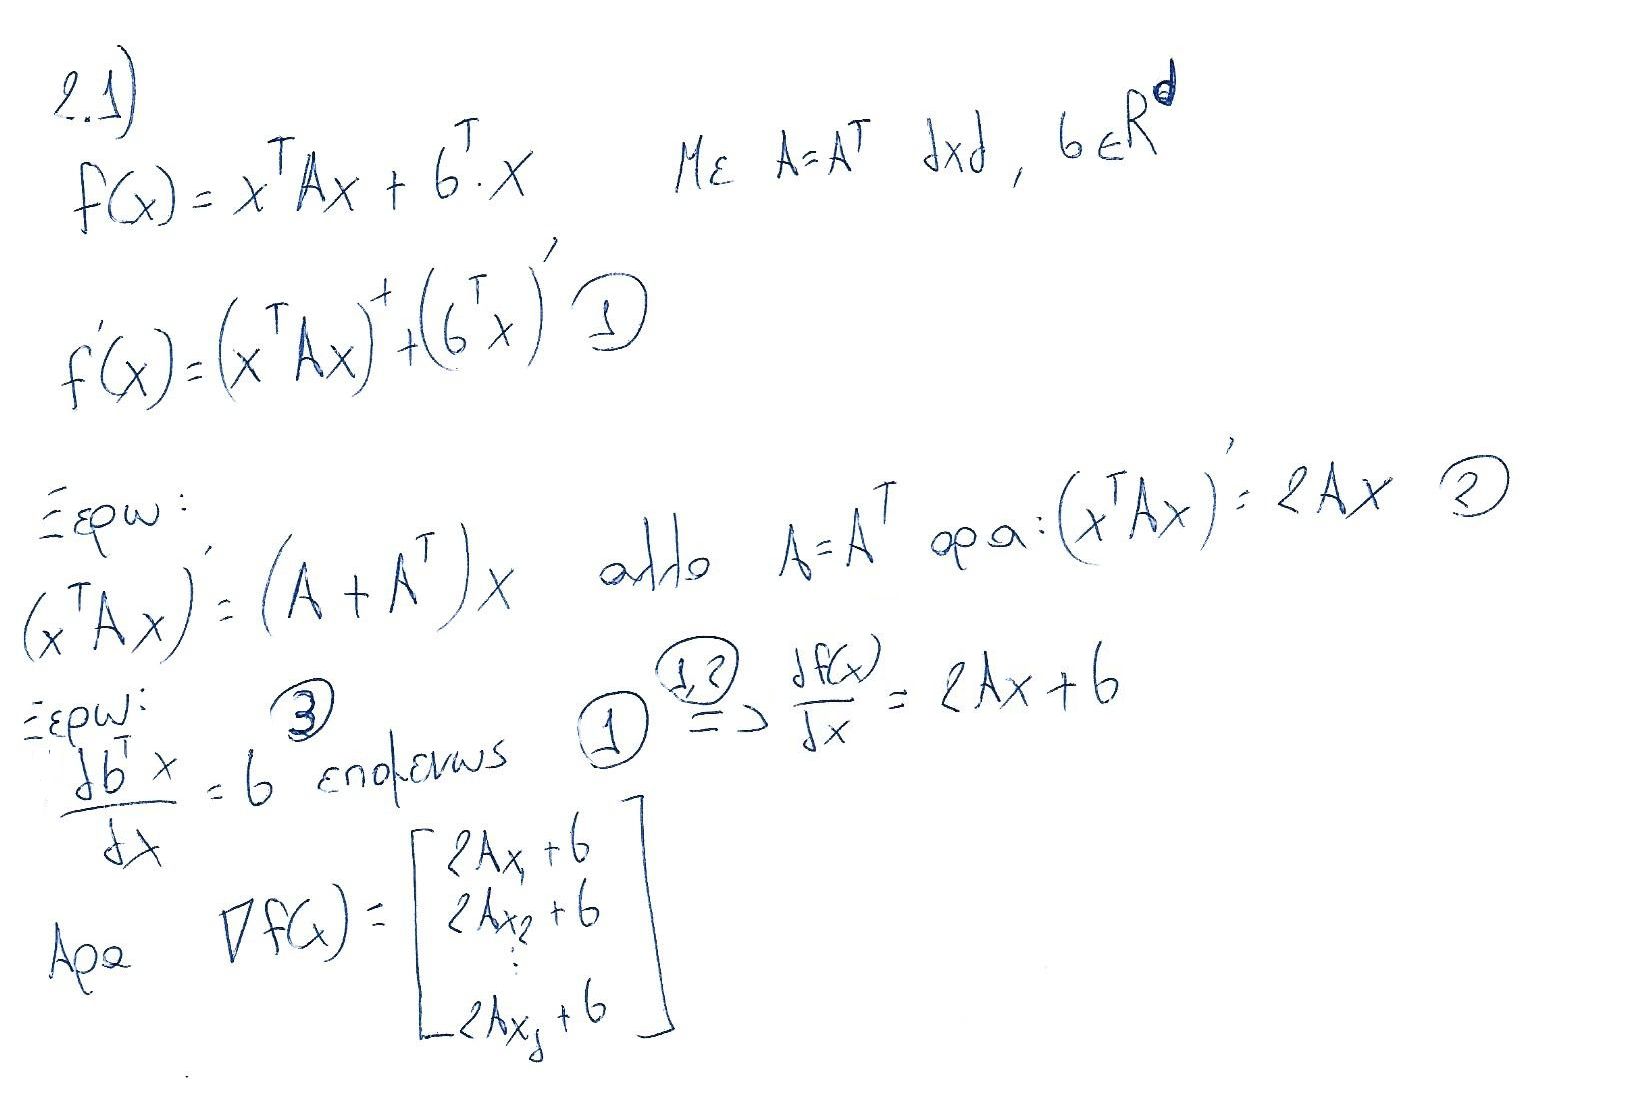

>2.2


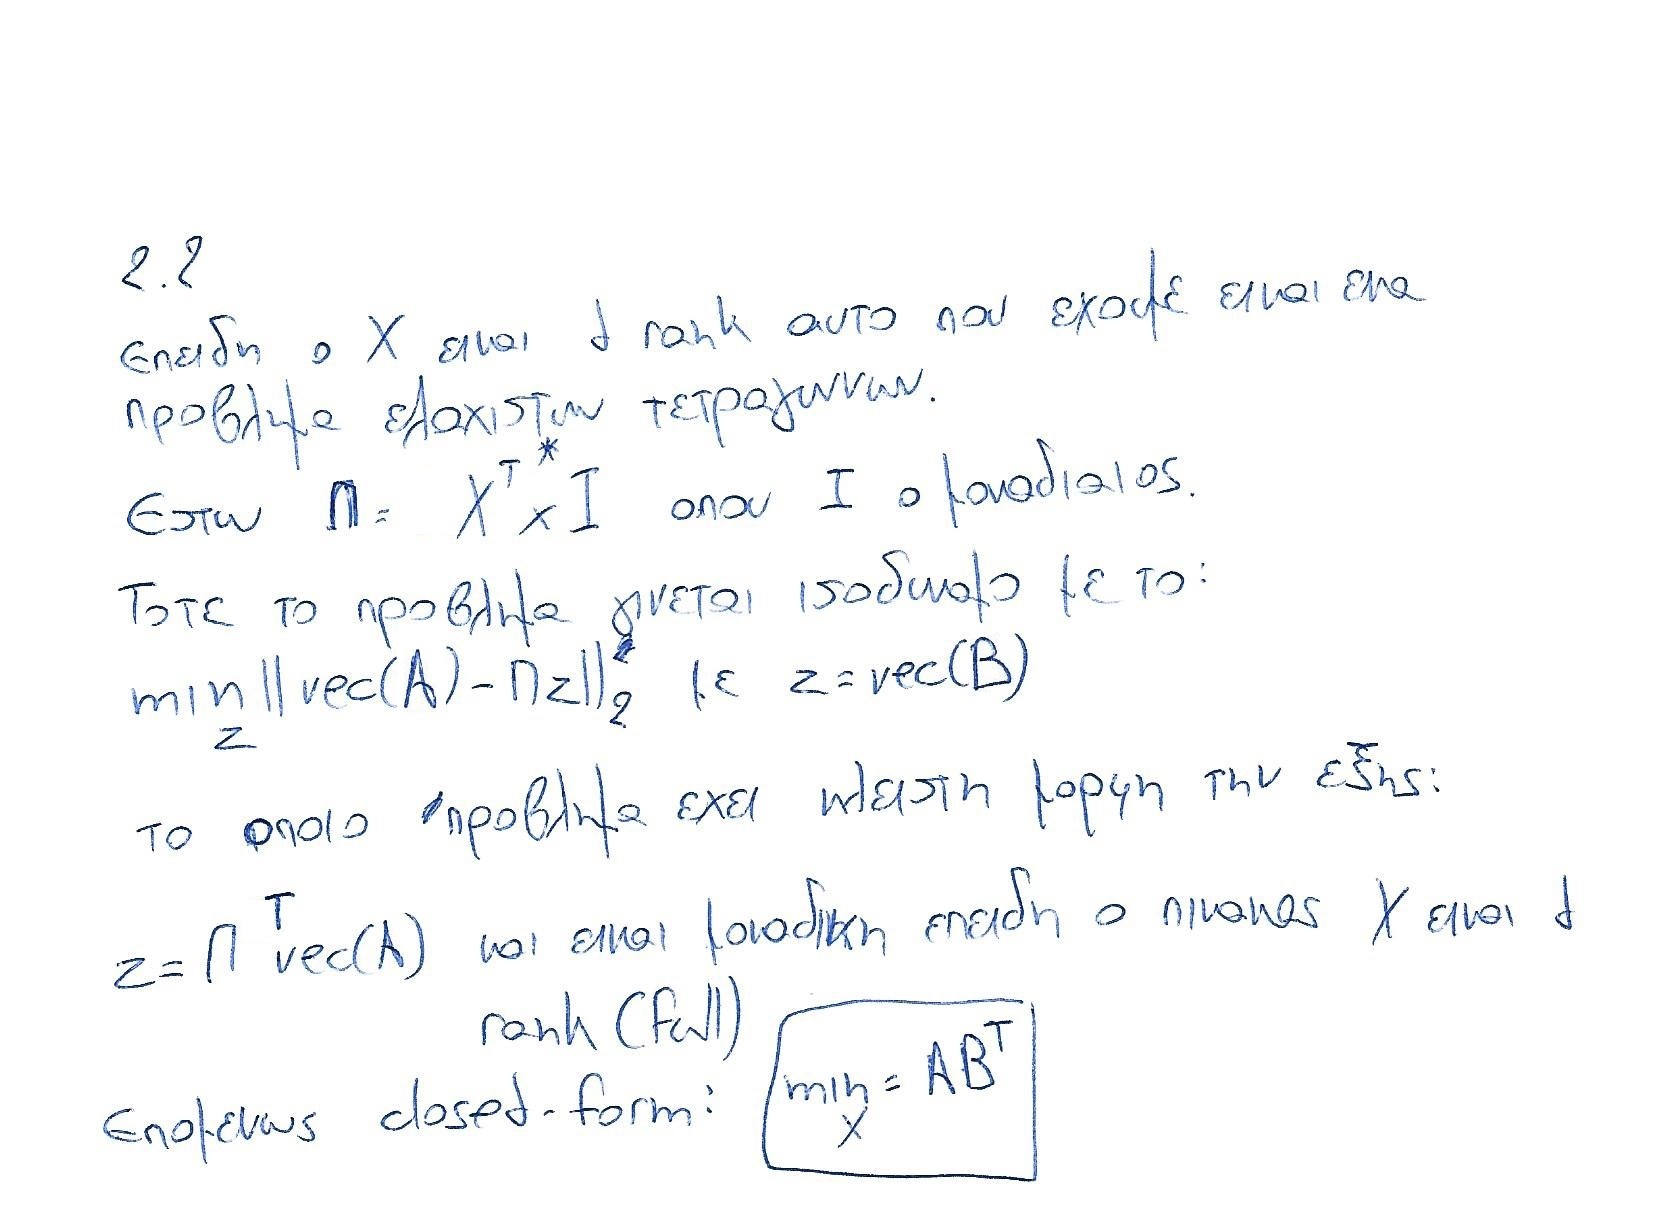

Επομενως το closed-form solution ειναι το:
***X = AB^T***

###[Ερώτημα 3: Gradient descent]

In [ ]:
import sympy 
x1 = sympy.Symbol('x1')
x2 = sympy.Symbol('x2')

f1 = (x1-2)**2 + (x2-3)**2
f2 = (1 - (x2 -3))**2 + 20*( (x1+3) - (x2-3)**2 )**2

df1x1 = f1.diff(x1)
df1x2 = f1.diff(x2)

df2x1 = f2.diff(x1)
df2x2 = f2.diff(x2)


In [ ]:
def gradientDescent2Vars(f, dfx1, dfx2, x1_v=0, x2_v=0, learning_rate=0.5, T=10, plotStep=1, showValue=True):
    ilist = []
    vlist = []
    for i in range(T):
        x1_temp = x1_v - learning_rate * (dfx1.replace(x1,x1_v).replace(x2,x2_v))
        x2_temp = x2_v - learning_rate * (dfx2.replace(x2,x2_v).replace(x1,x1_v))

        x1_v = x1_temp
        x2_v = x2_temp
        
        value = f.replace(x1,x1_temp).replace(x2,x2_temp)
        if showValue:
            print(f"Value of function(Itterations={i+1}): f = {value}")
        ilist.append(i)
        vlist.append(round(value,2))
    print('\n')
    plt.figure(figsize=(10, 4))
    plt.scatter(ilist, vlist)
    plt.xticks(np.arange(0, T, step=plotStep))
    plt.show()

>Gradient Descent for f1

############## Gradient Descent for f1 ##############
Value of function(Itterations=1): f = 0
Value of function(Itterations=2): f = 0
Value of function(Itterations=3): f = 0
Value of function(Itterations=4): f = 0
Value of function(Itterations=5): f = 0
Value of function(Itterations=6): f = 0
Value of function(Itterations=7): f = 0
Value of function(Itterations=8): f = 0
Value of function(Itterations=9): f = 0
Value of function(Itterations=10): f = 0




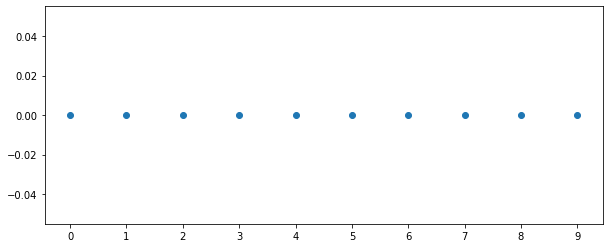

In [ ]:
print("############## Gradient Descent for f1 ##############")        
gradientDescent2Vars(f1,df1x1,df1x2, learning_rate=0.5)

>Gradient Descent for f2

############## Gradient Descent for f2 ##############
Value of function(Itterations=1): f = 5402136508880.00
Value of function(Itterations=2): f = 1.00944358810678E+42
Value of function(Itterations=3): f = 6.58303456372108E+129
Value of function(Itterations=4): f = 1.82582176549974E+393
Value of function(Itterations=5): f = 3.89542739261895E+1183
Value of function(Itterations=6): f = 3.78307817355730E+3554
Value of function(Itterations=7): f = 3.46510118416405E+10667
Value of function(Itterations=8): f = 2.66273371206064E+32006
Value of function(Itterations=9): f = 1.20826775139761E+96023
Value of function(Itterations=10): f = 1.12893653232202E+288073




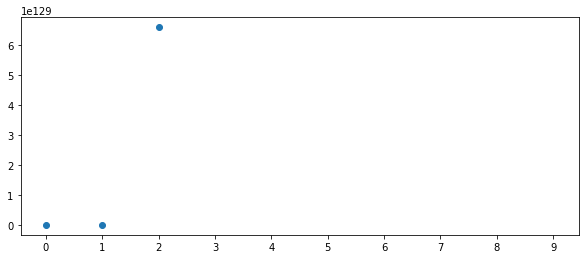

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.5)

###Επαναληψη της συναρτησης Gradient Descent για την f2 βαζοντας αλλες παραμετρους για περαιτερω μελετη

>learning_rate=0.001 και T=10

############## Gradient Descent for f2 ##############
Value of function(Itterations=1): f = 20.3337647923200
Value of function(Itterations=2): f = 11.7059966469107
Value of function(Itterations=3): f = 8.77113260918137
Value of function(Itterations=4): f = 7.95403592686053
Value of function(Itterations=5): f = 7.75299036947905
Value of function(Itterations=6): f = 7.70562116245195
Value of function(Itterations=7): f = 7.69348595941950
Value of function(Itterations=8): f = 7.68909490788718
Value of function(Itterations=9): f = 7.68637238225392
Value of function(Itterations=10): f = 7.68400603865860




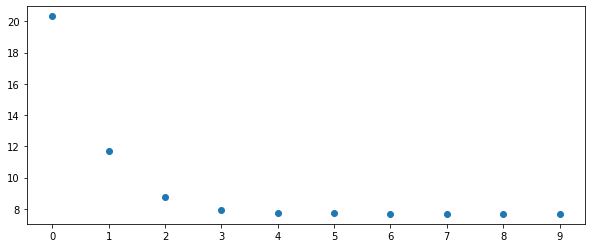

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.001)

>learning_rate=0.001 και T=50

############## Gradient Descent for f2 ##############




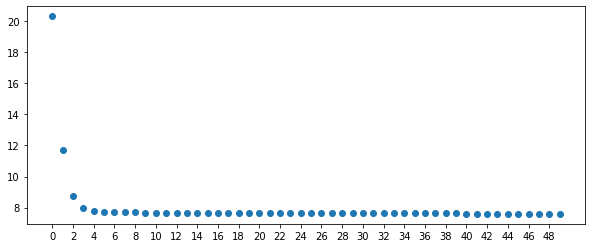

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.001, T=50, plotStep=2, showValue=False)

>learning_rate=0.001 και Τ=10 αλλα οι αρχικες τιμες των μεταβλητων =5

############## Gradient Descent for f2 ##############
Value of function(Itterations=1): f = 18.2047134787200
Value of function(Itterations=2): f = 3.77228671257229
Value of function(Itterations=3): f = 3.26693823825368
Value of function(Itterations=4): f = 3.21881310420765
Value of function(Itterations=5): f = 3.21462540422772
Value of function(Itterations=6): f = 3.21390924476857
Value of function(Itterations=7): f = 3.21348407903609
Value of function(Itterations=8): f = 3.21308289674160
Value of function(Itterations=9): f = 3.21268371524493
Value of function(Itterations=10): f = 3.21228471608190




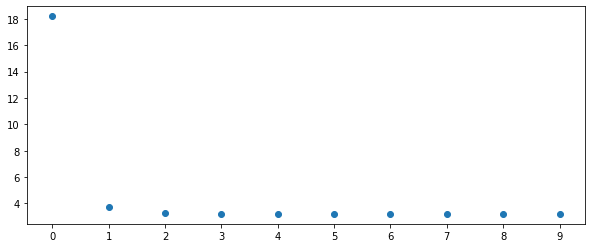

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.001, T=10, x1_v=5, x2_v=5)

>learning_rate=0.0001 και Τ=100

############## Gradient Descent for f2 ##############




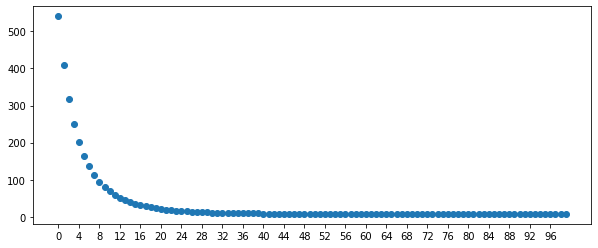

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.0001, T=100, plotStep=4, showValue=False)

>Μεγαλυτερο learning_rate = 0.9

############## Gradient Descent for f2 ##############




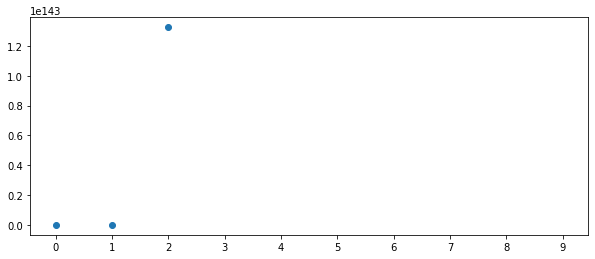

In [ ]:
print("############## Gradient Descent for f2 ##############")
gradientDescent2Vars(f2,df2x1,df2x2, learning_rate=0.9, T=10, plotStep=1, showValue=False)

###Παρατηρησεις

1. Η f2 ειναι μια "δυσκολη" συναρτηση που εχει πολυ μεγαλες τιμες με το default learning_rate και δεν μπορει να αναπαρασταθει ευκολα ουτε και να υπολογιστει το ελαχιστο της σε μονο 10 επαναληψεις.
2. Αλλαζοντας το learning_rate σε εναν μικροτερο αριθμο (0.001) παρατηρουμε οτι η συναρτηση συγκλινει πιο γρηγορα προς το ελαχιστο της. Στην αρχη με μεγαλα βηματα και οσο πλησιαζει στον στοχο με πολυ μικροτερα.
3. Αν πενταπλασιασουμε το Τ βλεπουμε ακριβως αυτο, οτι η καθε νεα τιμη της f2 ειναι μεν μικροτερη απο την προηγουμενη αλλα κατα πολυ λιγο, σε σχεση με τα αρχικα αλματα
4. Δεν βλεπουμε ουσιαστικη βελτιωση αλλαζοντας τις αρχικες τιμες των x1,x2 πραγμα που ηταν αναμενομενο διοτι η επιλογη των τιμων αυτων ειναι τυχαια και δεν πρεπει να επηρεαζει τους υπολογισμους μας
5. Αν μειωσουμε παραπανω το learning_rate(<0.001), δεν βλεπουμε καμια βελτιωση στις 10 επαναληψεις, για την ακριβεια τα αποτελεσματα μας ειναι χειροτερα με οταν ειχαμε learning_rate = 0.001. ΑΛΛΑ οταν αυξησουμε πολυ τις επαναληψεις εχουμε πολυ πιο μεγαλη ακριβεια στην συναρτηση μας. Συγκεκριμενα η f2 συγκλινει στο μηδεν
6. Οταν αυξησουμε το learning_rate τοτε η ακριβεια μας μειωνεται διοτι αχουμε να κανουμε με πολυ μεγαλους αριθμους και με μεγαλυτερο learning_rate επιλεγουμε να κανουμε πιο μεγαλα αλματα μεταξυ εκτιμησεων και ετσι δεν μπορουμε να βρουμε τις πραγματικες τιμες που θελουμε με μεγαλη ακριβεια